Importing Library:

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier 

Reading from CSV and EDA:

In [34]:
df=pd.read_csv('zoo.csv')

In [35]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [36]:
df.drop('animal_name',axis=1,inplace=True)

In [37]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [38]:
df.dtypes

hair          int64
feathers      int64
eggs          int64
milk          int64
airborne      int64
aquatic       int64
predator      int64
toothed       int64
backbone      int64
breathes      int64
venomous      int64
fins          int64
legs          int64
tail          int64
domestic      int64
catsize       int64
class_type    int64
dtype: object

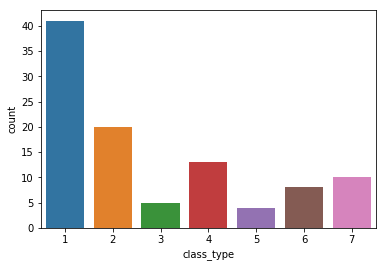

In [39]:
sns.countplot(x='class_type',data=df)

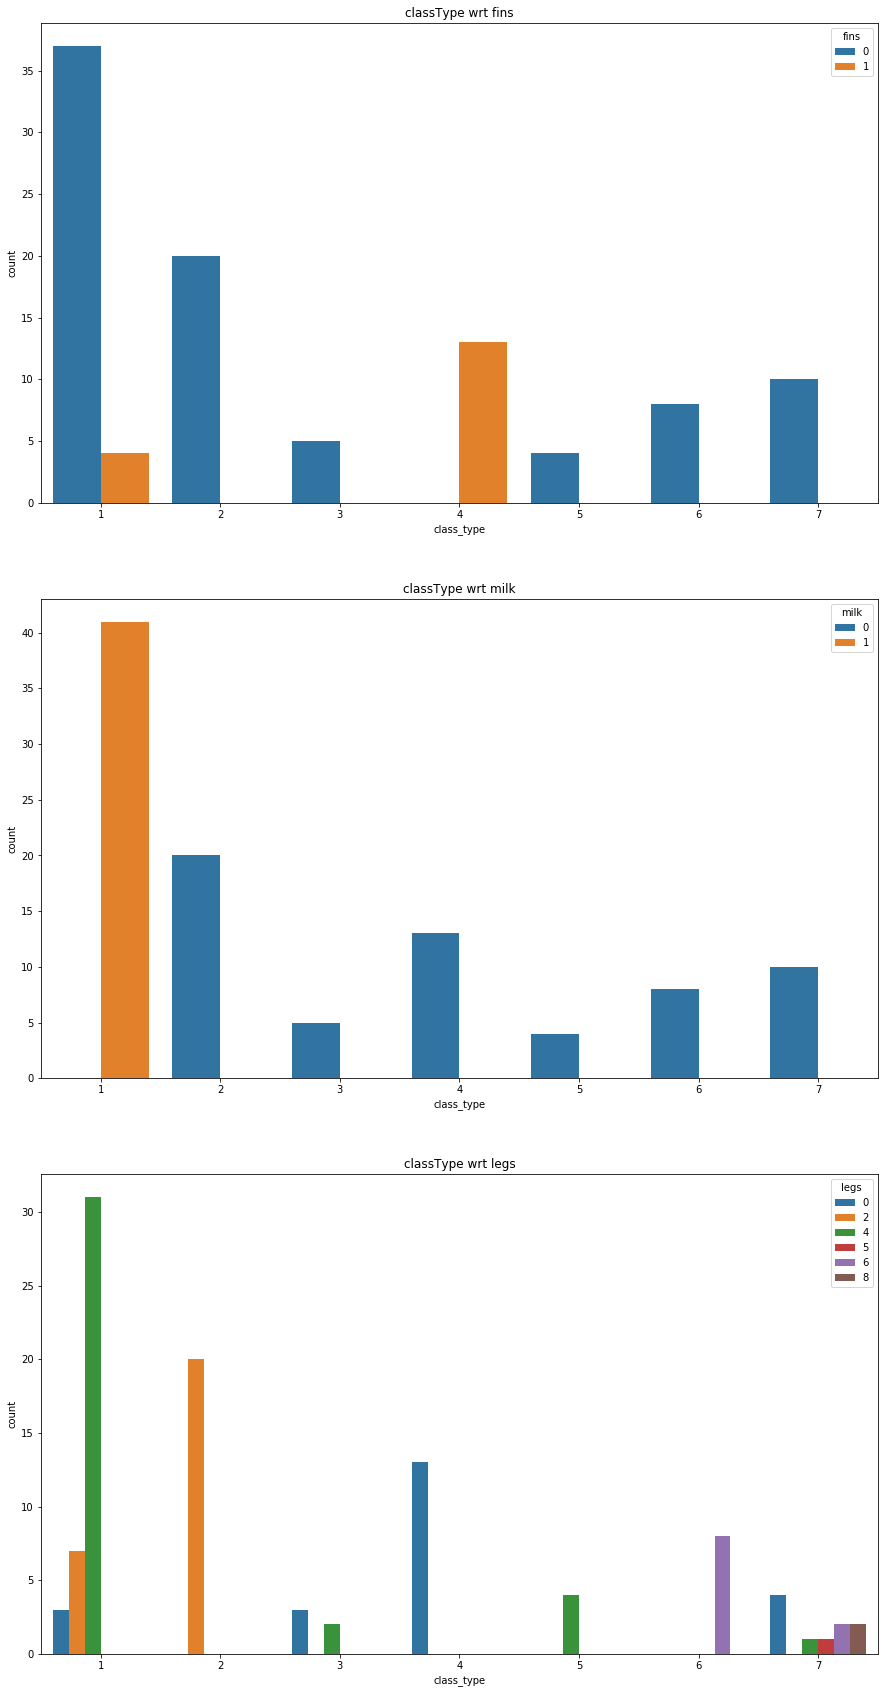

In [40]:
f,ax=plt.subplots(3,figsize=(15,30))
sns.countplot(x='class_type',hue='legs',data=df,ax=ax[2])
sns.countplot(x='class_type',hue='milk',data=df,ax=ax[1])
sns.countplot(x='class_type',hue='fins',data=df,ax=ax[0])
ax[0].set_title('classType wrt fins')
ax[1].set_title('classType wrt milk')
ax[2].set_title('classType wrt legs')

In [42]:
X=df.drop('class_type',axis=1)
y=df['class_type']

KNN model:

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [92]:
clf = KNeighborsClassifier(n_neighbors=5, metric='hamming')

In [93]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='hamming',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [94]:
clf.score(X_test,y_test)

0.95238095238095233

In [95]:
y_predictor = clf.predict(X_test)

In [96]:
from sklearn.metrics import confusion_matrix

In [97]:
cm = confusion_matrix(y_test,y_predictor)

In [106]:
xy=np.array([1,2,3,4,5,6,7])

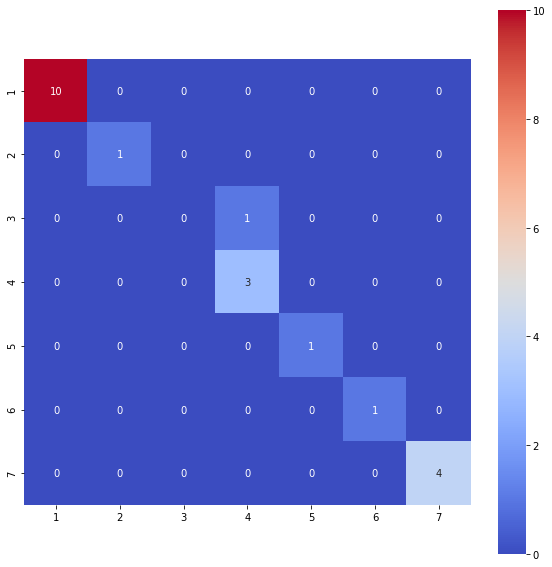

In [108]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,square=True,cmap='coolwarm',xticklabels=xy,yticklabels=xy)